In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.linalg
import scipy

print(np.__version__)
print(matplotlib.__version__)
print(scipy.__version__)

1.24.2
3.6.3
1.10.1


### System (VIII.11.5)

$ x' = -10(x - y) $

$ y' = -xz + 28x - y $

$ z' = xy - 8/3z $

Conditions:

$ x(0) = y(0) = z(0) = 1 $

$ 0 < t <= 50 $

In [2]:
def f(t, y): # t unused (autonomous)
    f = np.array(np.zeros(3)) #[0, 0, 0]
    f[0] = -10*(y[0] - y[1])
    f[1] = -y[0]*y[2] + 28*y[0] - y[1]
    f[2] = y[0]*y[1] - 8/3 * y[2]

    return f

## Runge–Kutta methods (explicit)
Used "default" (RK4) 4-stage and 4th-order method from Wikipedia.

In [3]:
def rungekutta_explicit(f, y0, t0, t_end, h):
    tn = t0
    yn = y0
    y = list()
    t = list()

    while tn < t_end:
        k1 = f(tn, yn) #RK4
        k2 = f(tn + h/2, yn + h/2 * k1)
        k3 = f(tn + h/2, yn + h/2 * k2)
        k4 = f(tn + h, yn + h * k3)

        yn1 = yn + h/6 * (k1 + 2*k2 + 2*k3 + k4)

        y.append(yn)
        t.append(tn)

        tn += h
        yn = yn1

    y = np.array(y)
    t = np.array(t)

    return y, t

In [4]:
rk_y, rk_t = rungekutta_explicit(f, y0=np.array([1, 1, 1]), t0=0, t_end=50, h=0.01)

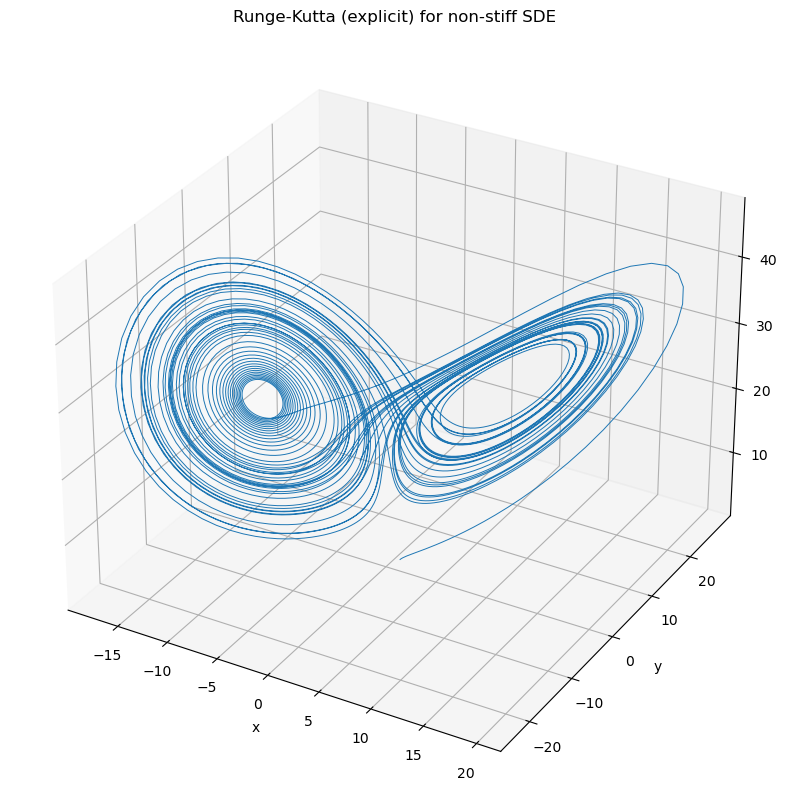

In [5]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(rk_y[:, 0], rk_y[:, 1], rk_y[:, 2], lw=0.7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Runge-Kutta (explicit) for non-stiff SDE")
plt.show()

## Adams methods
Used the following method:

$ y_n = y_{n-1} + \frac{h}{2}[3f(t_{n-1}, y_{n-1}) - f(t_{n-2}, y_{n-2})] $

In [53]:
def adams(f, y0, t0, t_end, h):
    y_launch, t_launch = rungekutta_explicit(f, y0, t0, t0 + 3*h, h)

    t0 += 4*h

    tn = t0
    y = list(y_launch)
    t = list(t_launch)

    while tn < t_end:

        n = int(tn / h) - 1
        #print(n)
        yn = y[n - 1] + h/2 * (3*f(t[n - 1], y[n - 1]) - f(t[n - 2], y[n - 2]))

        y.append(yn)
        t.append(tn)

        tn += h

    y = np.array(y)
    t = np.array(t)

    return y, t

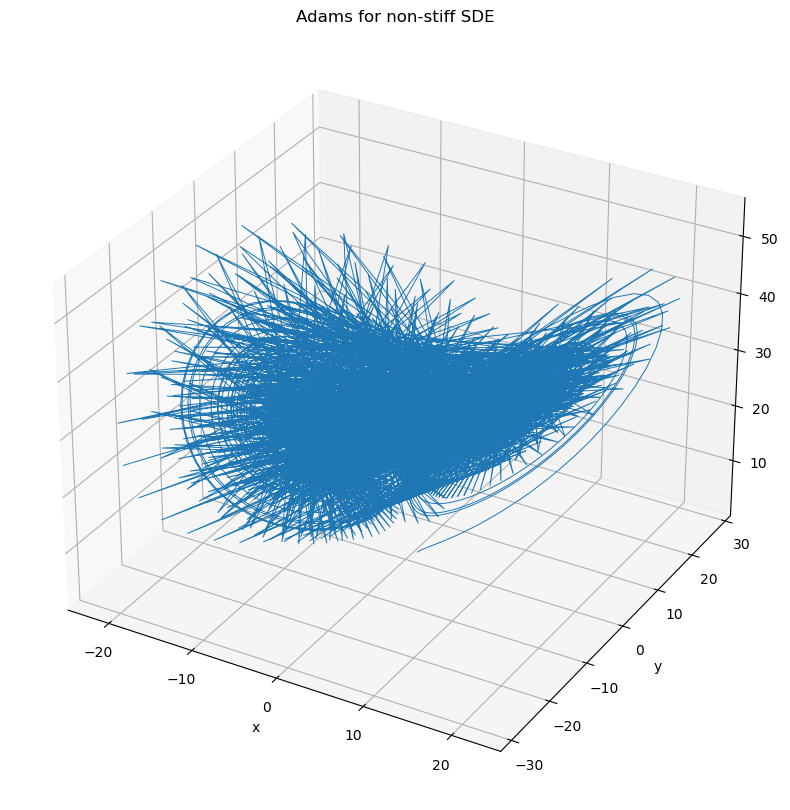

In [54]:
y_a, t_a = adams(f, y0=np.array([1, 1, 1]), t0=0, t_end=50, h=0.01)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(y_a[:, 0], y_a[:, 1], y_a[:, 2], lw=0.7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Adams for non-stiff SDE")
plt.show()